<a href="https://it-omscholing.nl/locaties/hogeschool-rotterdam/">
<div>
<a><img src='pics/banner.PNG'/></a>
</div>
<div>
<a href=''><img src='pics/miw.PNG'/></a>
<em>Author: Jeroen Boogaard</em>
</div>
</a>

<h1>Practicum Computer Vision</h1>

<h2>Imports<h2>

In [6]:
from PIL import Image
import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from numpy import expand_dims
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
import random
import requests
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array 
import zipfile






**Gebruik een <i>environment variable</i> voor het instellen van het logleven van TensorFlow**

In [7]:
os.environ['TF_CPP_MIN_LEVEL'] = '2'

<h2>Data Collection</h2>

<h3>Data downloaden</h3>

In [8]:
txtFiles = list()

In [9]:
# dataUrl = requests.get("http://madm.dfki.de/files/sentinel/EuroSAT.zip") # foto's verdeeld over 10 klassen.
# dataFile = zipfile.ZipFile(io.BytesIO(dataUrl.content))

riverDirectory = 'pics/2750/River'
 
for filename in os.listdir(riverDirectory): # hergebruiken -> maakt een lijst met alle bestandsnamen uit river.
    txtFile = os.path.join(riverDirectory, filename)
    txtFiles.append(txtFile) # Append is een functie van lijsten en werkt niet bij
    print(txtFile)


pics/2750/River/River_1456.jpg
pics/2750/River/River_1330.jpg
pics/2750/River/River_1324.jpg
pics/2750/River/River_1442.jpg
pics/2750/River/River_2163.jpg
pics/2750/River/River_906.jpg
pics/2750/River/River_912.jpg
pics/2750/River/River_1318.jpg
pics/2750/River/River_2177.jpg
pics/2750/River/River_1495.jpg
pics/2750/River/River_5.jpg
pics/2750/River/River_721.jpg
pics/2750/River/River_735.jpg
pics/2750/River/River_2188.jpg
pics/2750/River/River_1481.jpg
pics/2750/River/River_709.jpg
pics/2750/River/River_1132.jpg
pics/2750/River/River_286.jpg
pics/2750/River/River_1654.jpg
pics/2750/River/River_2349.jpg
pics/2750/River/River_1898.jpg
pics/2750/River/River_292.jpg
pics/2750/River/River_1640.jpg
pics/2750/River/River_1126.jpg
pics/2750/River/River_2407.jpg
pics/2750/River/River_2361.jpg
pics/2750/River/River_1668.jpg
pics/2750/River/River_2375.jpg
pics/2750/River/River_2413.jpg
pics/2750/River/River_523.jpg
pics/2750/River/River_1697.jpg
pics/2750/River/River_245.jpg
pics/2750/River/Rive

In [10]:
highwayDirectory = 'pics/2750/Highway'
 
for filename in os.listdir(highwayDirectory):
    txtFile = os.path.join(highwayDirectory, filename)
    txtFiles.append(txtFile) # Append is een functie van lijsten en werkt niet bij
    # print(txtFile)

<h3>Data filteren</h3>

In [15]:
txtFiles = [x for x in txtFiles if ".jpg" in x] # manier op de .jpg te scheiden van de andere bestandtypes. 

print(txtFiles[2])

pics/2750/River/River_1324.jpg


<h3>Data inlezen</h3>

In [16]:
imageObjects = np.zeros([len(txtFiles), 64, 64, 3]) 
# gebruik img height and width in een var bovenaan NB.

# aanmaken van lege array van 64x64x3 pixels/datatype. (aantal arrays is 'len' van 'tekstfiles'.)

i = 0

for txtFile in txtFiles:
    imageObjects[i] = np.asarray(Image.open(txtFile)).astype('uint8')/255 # Afbeelding wordt genormaliseerd.
    i += 1


# print(imageObjects[0])


**Gebruik de bestandsnamen voor het verkrijgen van de labels**

In [17]:
# imageLabels = np.empty(len(txtFiles), dtype = 'S20')

i = 0

for label in txtFiles:
    txtFiles[i] = label.split('/')[2]
    i += 1
    
print(label)
print(txtFiles[0])
labelNames, labelNumbers = np.unique(txtFiles, return_inverse=True)
labelDict = dict(zip(np.unique(labelNumbers), labelNames))
print(labelNames)
# print(labelNumbers)

np.array(np.unique(labelNumbers, return_counts=True)).T

pics/2750/Highway/Highway_199.jpg
River
['Highway' 'River']


array([[   0, 2500],
       [   1, 2500]])

In [18]:
# change them to integers in alphabetical order
labelNames, labelNumbers = np.unique(txtFiles, return_inverse=True)
labelDict = dict(zip(np.unique(labelNumbers), labelNames))
print(labelNames)
print(labelNumbers)

np.array(np.unique(labelNumbers, return_counts=True)).T

['Highway' 'River']
[1 1 1 ... 0 0 0]


array([[   0, 2500],
       [   1, 2500]])

<h3>Data splitten</h3>

In [19]:
trainSet, testSet, trainLabels, testLabels = train_test_split(imageObjects, labelNumbers, stratify = labelNumbers, train_size = 0.75, random_state=42)
print(trainSet.shape)
nrOfImages = len(trainSet)

(3750, 64, 64, 3)


<h3>Data inspecteren</h3>

In [20]:
def inspectData():
    
    plt.figure(figsize=(10,10))
    
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        number = i
        plt.imshow(trainSet[number])
        plt.xlabel(labelNames[trainLabels[number]]) 
    
    plt.show()

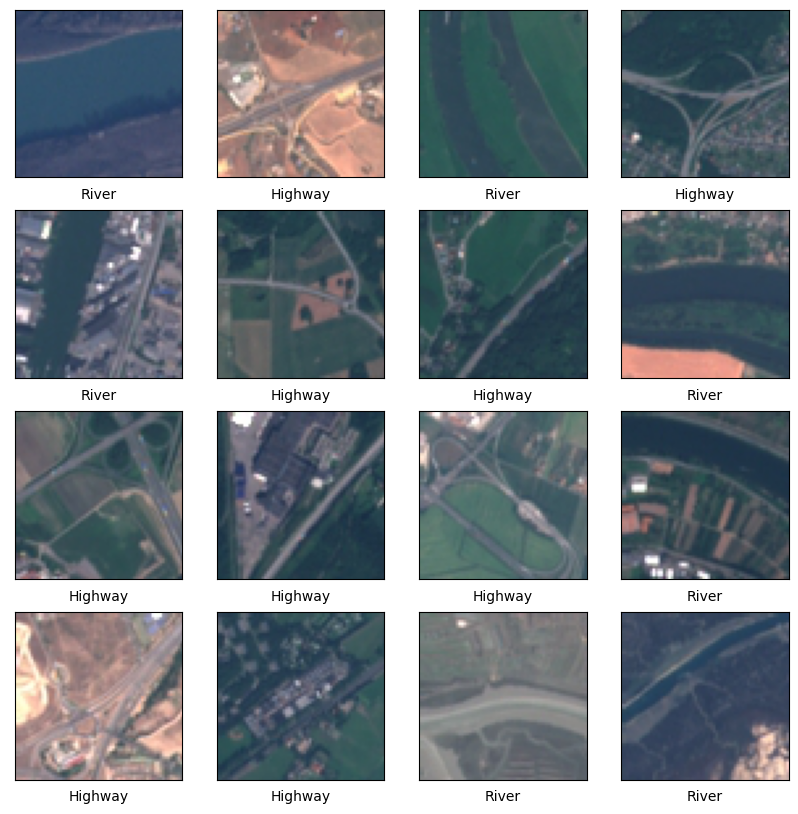

In [21]:
inspectData()    

<h2>Maak een model</h2>

<h3>Definieer de netwerktopologie</h3>

In [ ]:
class_names = labelNames

In [ ]:
num_classes = len(labelNames)

model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes)) # outputs

model.summary()



<h3>Exercise 1</h3>
<p>
    Vul de netwerktopologie tot een bruikbaar Neural Netwerk onstaat.
</p>

<h3>Definieer de trainparameters</h3>

In [ ]:
lossFunction = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
gdAlgorithm = keras.optimizers.Adam(learning_rate=0.001)
nrOfEpochs = 5

<h3>Train het model</h3>

In [ ]:
model.compile(optimizer=gdAlgorithm, loss=lossFunction, metrics="accuracy")
history = model.fit(trainSet, trainLabels, epochs=nrOfEpochs, batch_size=64, verbose=2)



In [ ]:
# model.save('/Users/boyfrankclaesen/workspace/makeAIWork2/opdrachten/practica/week07/image_recognition/notebook/cnn_trained')

<h3>Test het model</h3>

In [ ]:
# model.compile(optimizer=gdAlgorithm, loss=lossFunction, metrics="accuracy")
# historyTest = model.fit(testSet, testLabels, epochs=nrOfEpochs, batch_size=64, verbose=2)


<h3>Exercise 2</h3>
<p>
    Test het Neural Netwerk met de testset en laat zien of het in staat is de juiste class te vinden.
</p>

In [ ]:
# make a plot from history and historyTest

# # summarize history for accuracy
# plt.plot(history.history['accuracy'])
# plt.plot(historyTest.history['accuracy'])
# plt.title('model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.show()
# # plt.savefig('/Users/boyfrankclaesen/workspace/makeAIWork2/opdrachten/practica/week07/image_recognition/[NAME]')

# # summarize history for loss
# plt.plot(history.history['loss'])
# plt.plot(historyTest.history['loss'])
# plt.title('model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.show()
# # plt.savefig('/Users/boyfrankclaesen/workspace/makeAIWork2/opdrachten/practica/week07/image_recognition/[NAME]')


In [ ]:
# Option 1: prediction based on a downloaded and imported photo.

openImage1 = load_img('River_7.jpg')
openImage2 = load_img('River_250.jpg')
openImage3 = load_img('Highway_12.jpg') 
openImage4 = load_img('Highway_11.jpg')
openImage5 = load_img('Rotterdam1.png',target_size=(64, 64))
openImage6 = load_img('Rotterdam2.png',target_size=(64, 64))
openImage7 = load_img('Rotterdam3.png',target_size=(64, 64))
                      
#THE MODEL:
# model = r'./cnn_trianed'
cnn_trained = r'./cnn_trained'
# model = tf.keras.models.load_model(cnn_trained) # inladen trainingsmodel in keras?
# print(model)


def makePrediction(openImage): # functie voor om plaa
    
    img = np.asarray(openImage).astype('uint8')/255 # normaliseren van de foto.
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    
    model = tf.keras.models.load_model(cnn_trained) # inladen trainingsmodel in keras?
    
    prediction = model.predict(img_array)
    score = tf.nn.softmax(prediction[0])
    print('This image most likely belongs to {} with a {:.2f} percent confidence.'
         .format(labelNames[np.argmax(score)], 100 * np.max(score)),'\n'
         )
    plt.imshow(img)
    
makePrediction(openImage7)

In [ ]:
# # Option 2: prediction of an image form the trainSet.

i = 499
img = trainSet[i]

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
model = tf.keras.models.load_model(cnn_trained) # inladen trainingsmodel in keras?
prediction = model.predict(img_array)
score = tf.nn.softmax(prediction[0])

# print(prediction,'\n')
# print(score,'\n')
print('This image most likely belongs to {} with a {:.2f} percent confidence.'
     .format(labelNames[np.argmax(score)], 100 * np.max(score))
)

plt.imshow(img)


In [ ]:
# Create a confusion matrix:

predicted = model.predict(testSet, batch_size = 16)   # testSet zijn de foto's!
predicted = np.argmax(predicted, axis=-1)             # maakt '1' en '0' van de matrices
# print(predicted)

actual = np.argmax(testLabels,axis=-1)# testLabels

confusion_matrix = metrics.confusion_matrix(testLabels, predicted)
# print(confusion_matrix)

#visual:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Highway', 'River'])
cm_display.plot()
plt.show()